In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 41)
X teste =  (381005, 41)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[0.5347606 , 0.48215198, 0.85074627, ..., 0.07575758, 0.07575758,
        0.07575758],
       [0.12192139, 0.75029785, 0.85074627, ..., 0.03030303, 0.12121212,
        0.03030303],
       [0.18585427, 0.40059416, 0.85074627, ..., 0.03030303, 0.03030303,
        0.12121212],
       ...,
       [0.15698385, 0.12545452, 0.85074627, ..., 0.10606061, 0.16666667,
        0.16666667],
       [0.63209957, 0.37606957, 0.85074627, ..., 0.        , 0.        ,
        0.01515152],
       [0.48259261, 0.7325504 , 0.89552239, ..., 0.04545455, 0.04545455,
        0.01515152]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1126124    Benign
1202977    Benign
39741      Benign
156053     Benign
1230603    Benign
            ...  
110268     Benign
259178     Benign
131932     Benign
671155     Benign
121958     Benign
Name: Label_multiclass, Length: 889011, dtype: object
1126124    0
1202977    0
39741      0
156053     0
1230603    0
          ..
110268     0
259178     0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 889011, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [10]:
with open('df_unsw_test50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 41)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[0.37028437, 0.36629067, 0.85074627, ..., 0.07575758, 0.07575758,
        0.07575758],
       [0.05414945, 0.71379721, 0.85074627, ..., 0.04545455, 0.04545455,
        0.        ],
       [0.63784269, 0.7325504 , 0.89552239, ..., 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.00701249, 0.7325504 , 0.89552239, ..., 0.45454545, 0.45454545,
        0.39393939],
       [0.01221381, 0.55468907, 0.85074627, ..., 0.06060606, 0.07575758,
        0.        ],
       [0.20362544, 0.79492178, 0.85074627, ..., 0.01515152, 0.01515152,
        0.01515152]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Generic' ... 'Benign' 'Benign' 'Benign']
[0 0 1 ... 0 0 0]


In [19]:
#X_test50.shape

In [20]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo RandomForest para Train e Validation - Train50

In [21]:
from sklearn.ensemble import RandomForestClassifier

### Predição train50 binária

In [22]:
rforest_train50_binary = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [23]:
rforest_train50_binary.fit(X_train50_train, y_train50_binary_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [24]:
predict_train50_binary = rforest_train50_binary.predict(X_train50_test)

In [25]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9970840277686644

### Visualização da árvore binária

In [28]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

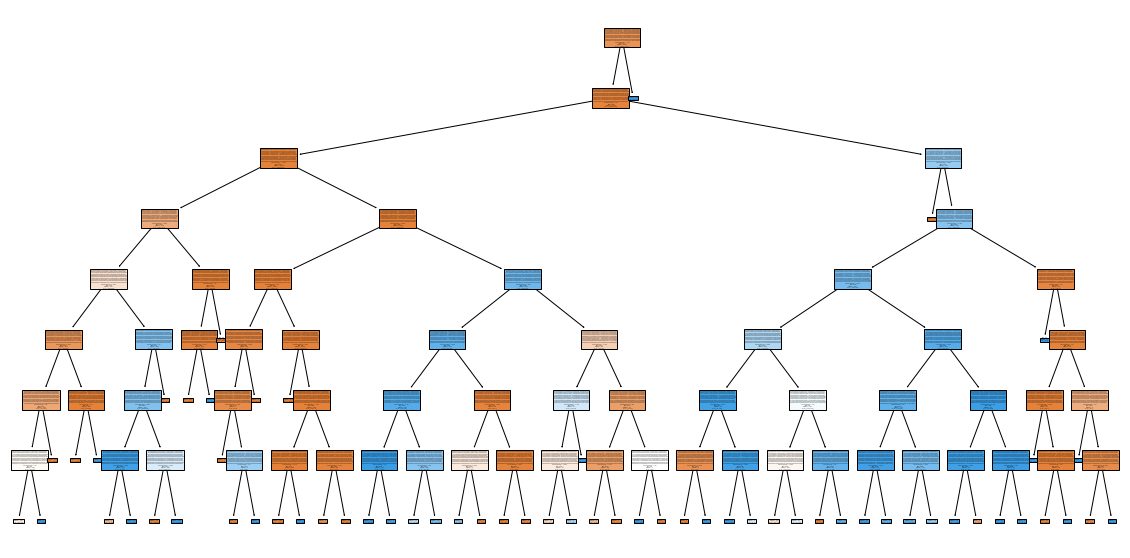

In [29]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_binary.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [30]:
#viz = dtreeviz(rforest_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

### Predição train50 multiclasse

In [31]:
rforest_train50_multiclass = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

In [32]:
rforest_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [33]:
predict_train50_multiclass = rforest_train50_multiclass.predict(X_train50_test)

In [34]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [35]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [36]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.982955604257162

### Visualização da árvore multiclasse

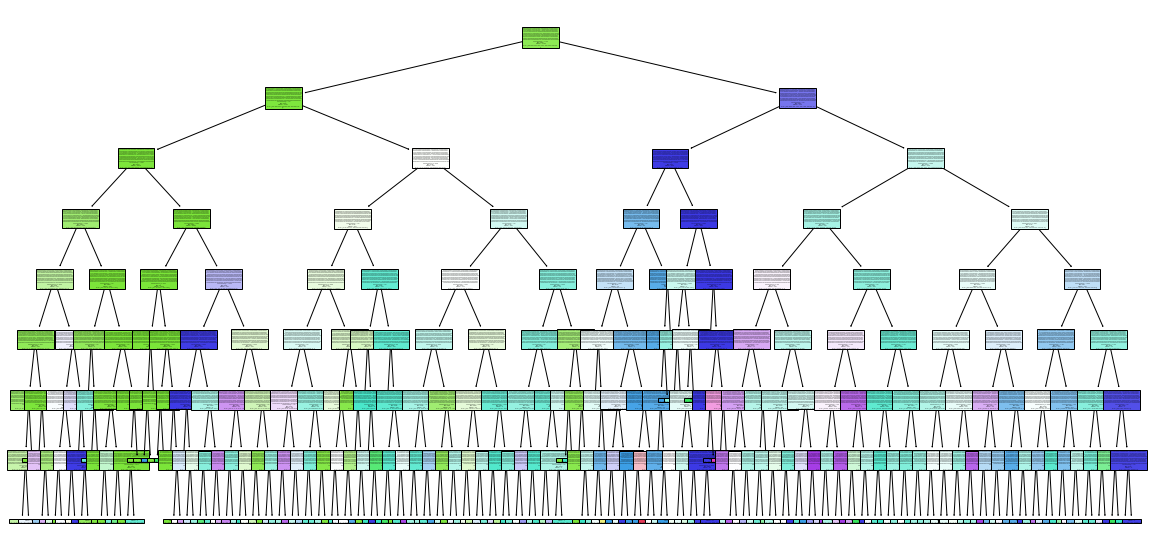

In [37]:
plt.figure(figsize=(20,10))
grafic = tree.plot_tree(rforest_train50_multiclass.estimators_[0], feature_names=X_train50_train[:,:], filled=True)

In [38]:
#viz = dtreeviz(rforest_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

### Precision e Recall do train50

In [39]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999852  0.996808  0.998328    332738
           1   0.978450  0.998985  0.988611     48267

    accuracy                       0.997084    381005
   macro avg   0.989151  0.997897  0.993469    381005
weighted avg   0.997141  0.997084  0.997097    381005



In [40]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000       400
      Backdoor   1.000000  0.003185  0.006349       314
        Benign   0.999244  0.997575  0.998409    332738
           DoS   0.730159  0.074494  0.135195      2470
      Exploits   0.592030  0.932920  0.724373      6768
       Fuzzers   0.649340  0.844832  0.734297      3667
       Generic   0.998542  0.974537  0.986394     32322
Reconnaissance   0.935238  0.706136  0.804698      2086
     Shellcode   0.785714  0.050459  0.094828       218
         Worms   1.000000  0.000000  0.000000        22

      accuracy                       0.982956    381005
     macro avg   0.869027  0.458414  0.448454    381005
  weighted avg   0.986368  0.982956  0.980883    381005



### Cross Validation do train50

In [41]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(rforest_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [42]:
score_cv_train50_binary

array([0.99696295, 0.99716539, 0.99714289, 0.99695167, 0.99701916,
       0.99694042, 0.99719913, 0.99734536, 0.99721038, 0.99718788])

In [43]:
cv_result_train50_binary

[0.9971125218355834]

In [44]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(rforest_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [45]:
score_cv_train50_multiclass

array([0.98293627, 0.98320604, 0.98267736, 0.98318354, 0.98259862,
       0.98212619, 0.98282359, 0.98323978, 0.98232866, 0.98247489])

In [46]:
cv_result_train50_multiclass

[0.9827594932157492]

### Matriz de Confusão do train50

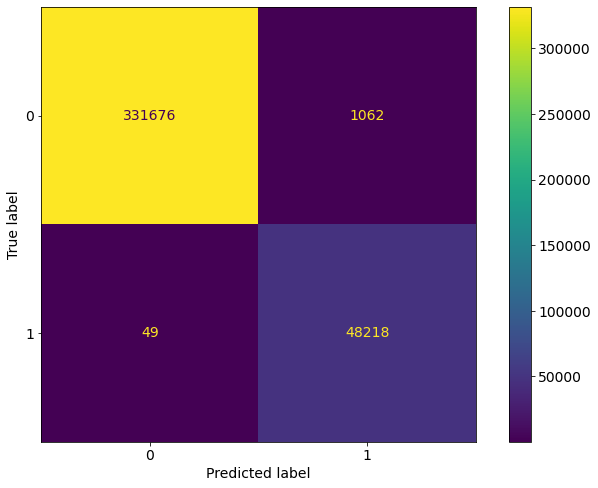

In [47]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

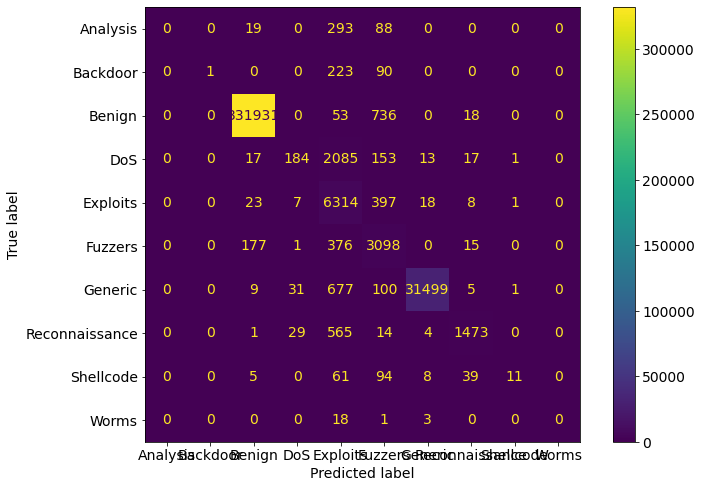

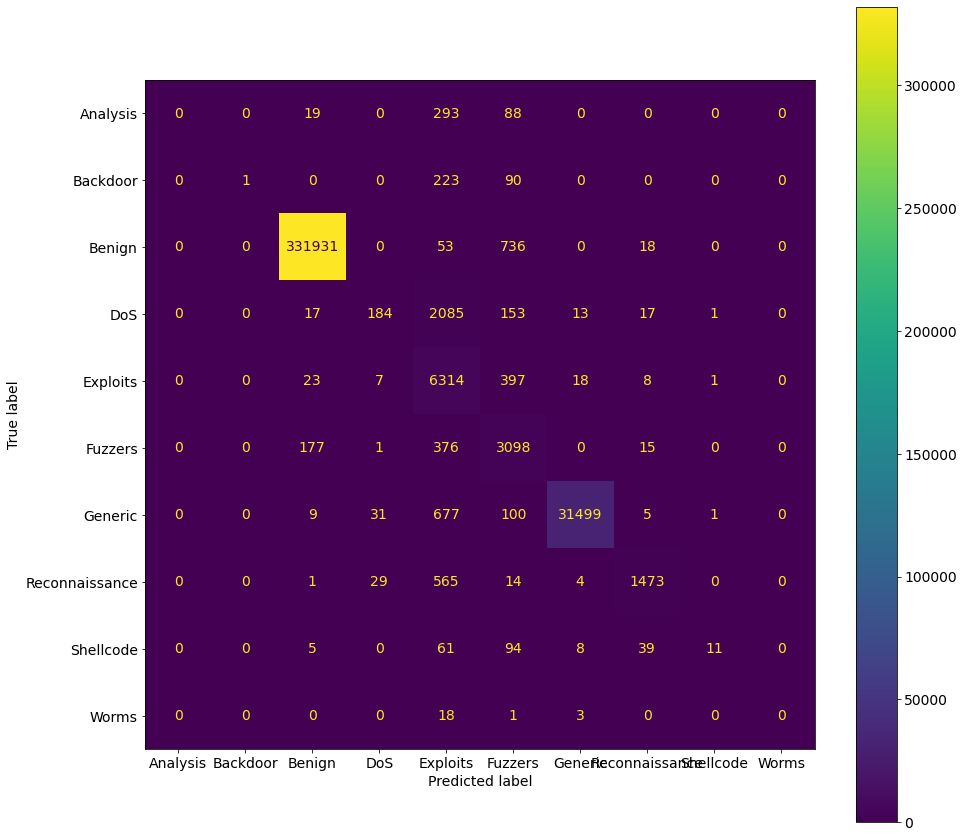

In [48]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)

# Algoritmo RandomForest para Test50

### Predição Test50 binária

In [49]:
predict_test50_binary = rforest_train50_binary.predict(X_test50)

In [50]:
predict_test50_binary

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.19957354935126903

### Predição test50 multiclasse

In [53]:
predict_test50_multiclass = rforest_train50_multiclass.predict(X_test50)

In [54]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [55]:
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [56]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9573494233939991

### Precision e Recall do test50

In [57]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.083672  0.154423   1109380
           1   0.136458  1.000000  0.240147    160638

    accuracy                       0.199574   1270018
   macro avg   0.568229  0.541836  0.197285   1270018
weighted avg   0.890775  0.199574  0.165266   1270018



In [58]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   1.000000  0.000000  0.000000      1338
      Backdoor   1.000000  0.008591  0.017036      1164
        Benign   1.000000  0.969597  0.984564   1109380
           DoS   0.333458  0.765044  0.464469      8176
      Exploits   0.570845  0.570793  0.570819     22262
       Fuzzers   0.260785  0.855151  0.399684     12123
       Generic   0.982245  0.984862  0.983552    107740
Reconnaissance   0.854798  0.670099  0.751263      6993
     Shellcode   0.857143  0.087417  0.158654       755
         Worms   1.000000  0.000000  0.000000        87

      accuracy                       0.957349   1270018
     macro avg   0.785927  0.491155  0.433004   1270018
  weighted avg   0.978740  0.957349  0.964527   1270018



### Matriz de Confusão do test50

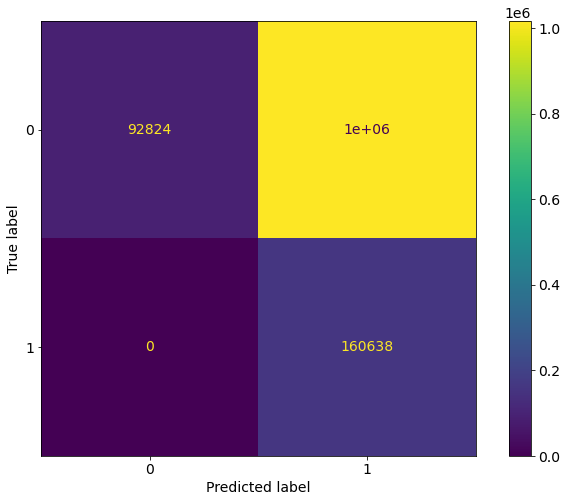

In [59]:
ConfusionMatrixDisplay.from_estimator(rforest_train50_binary, X_test50, y_test50_binary)
plt.show()

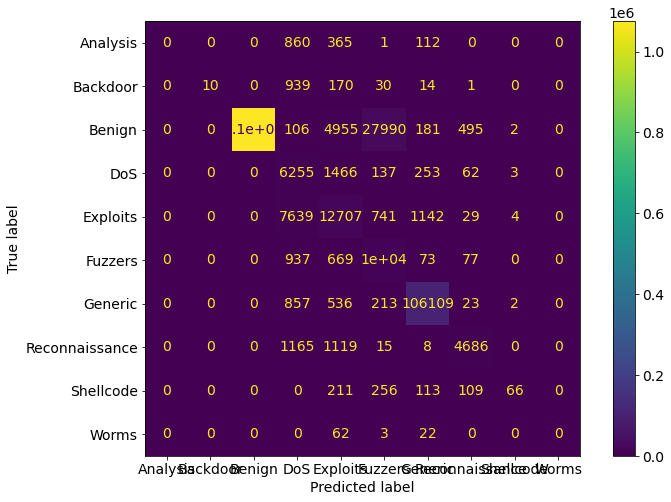

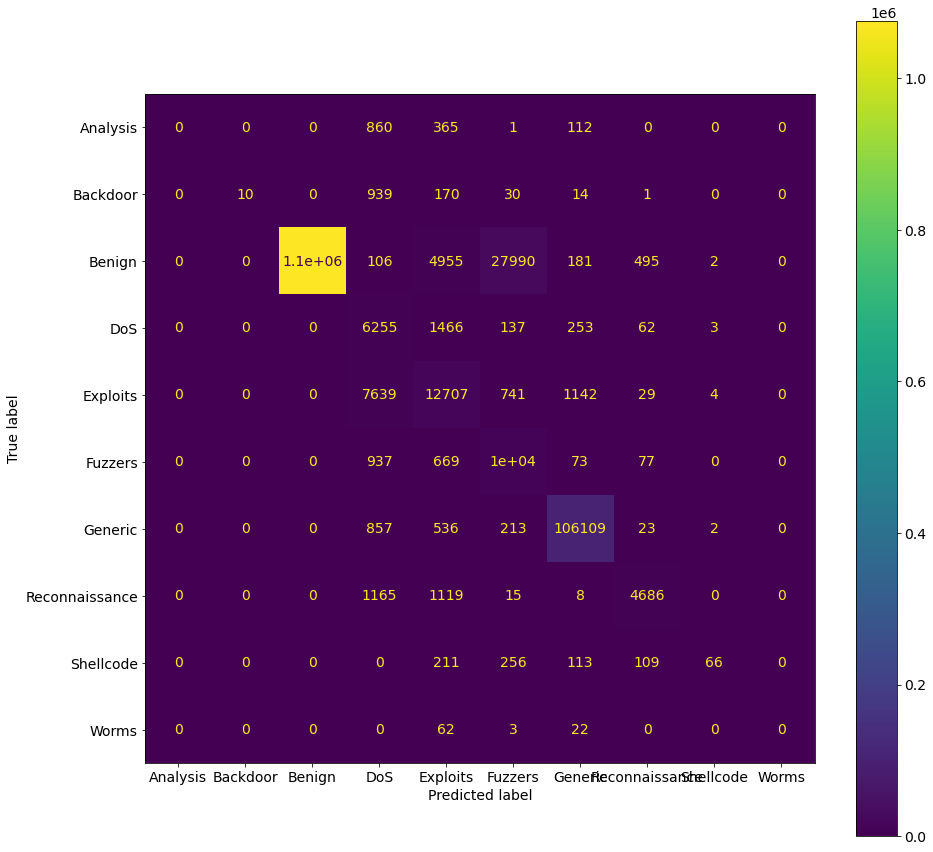

In [60]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_rforest_multiclass_train = ConfusionMatrixDisplay.from_estimator(rforest_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_rforest_multiclass_train.plot(ax=ax)